In [1]:
import pandas as pd
import numpy as np
from keras.src.backend.jax.random import categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

In [3]:
# Assuming X is the NumPy array of your images (50000, 32, 32, 3)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Keep the image shape as (50000, 32, 32, 3)

In [4]:
num_of_classes = 10

# Correct usage: Apply to labels only
y_train = to_categorical(y_train, num_of_classes)
y_test = to_categorical(y_test, num_of_classes)

In [5]:
model_cnn = models.Sequential()

# 1. Corrected Input Shape for CIFAR-10
model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Optional: You can combine the two MaxPooling layers or use a larger stride
model_cnn.add(layers.MaxPooling2D(2, 2))
model_cnn.add(layers.MaxPooling2D(2, 2))

model_cnn.add(layers.Flatten())

# Classification Head
model_cnn.add(layers.Dense(1024, activation='relu'))
model_cnn.add(layers.Dropout(0.5)) # Moved Dropout here

# 2. Corrected Output Layer for 10-Class Classification
model_cnn.add(layers.Dense(10, activation='softmax'))

D:\Semester 6\Projects\Pycharm\DIP\DIP Lab Work\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model_cnn.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.5120 - loss: 1.3620 - val_accuracy: 0.6328 - val_loss: 1.0442
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.6504 - loss: 0.9866 - val_accuracy: 0.6887 - val_loss: 0.9072
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.7034 - loss: 0.8403 - val_accuracy: 0.7146 - val_loss: 0.8234
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.7412 - loss: 0.7383 - val_accuracy: 0.7264 - val_loss: 0.7966
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.7722 - loss: 0.6491 - val_accuracy: 0.7389 - val_loss: 0.7623
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8025 - loss: 0.5637 - val_accuracy: 0.7508 - val_loss: 0.7489
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.8280 - loss: 0.4888 - val_accuracy: 0.7477 - val_loss: 0.7736
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.8500 - loss: 0.4222 - 

In [13]:
test_loss, test_acc = model_cnn.evaluate(x_test, y_test)
print(f'Test Accuracy = {test_acc*100:.4f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7559 - loss: 0.8675
Test Accuracy = 75.5900%


56.0


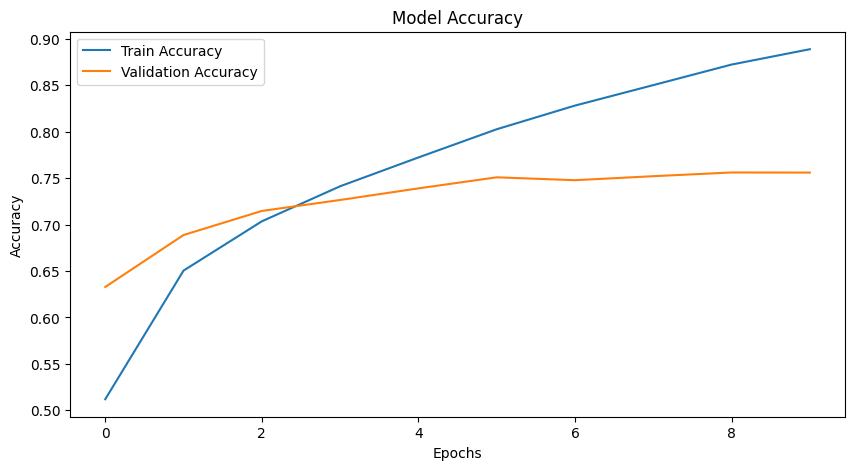

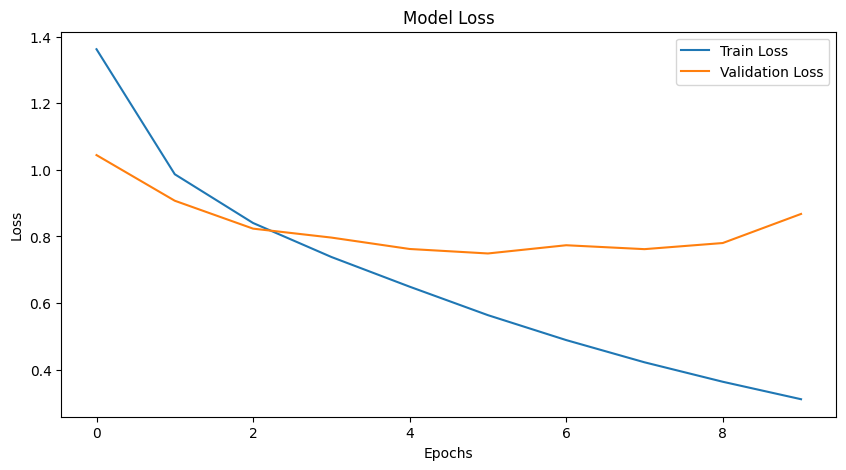

In [15]:
import matplotlib.pyplot as plt

# --- Plot 1: Accuracy ---
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# --- Plot 2: Loss ---
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
print(test_loss)

0.8675330281257629
